ANALYSE SE QUALITÉ DES VINS ROUGE


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [29]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


histogramme de qualité 

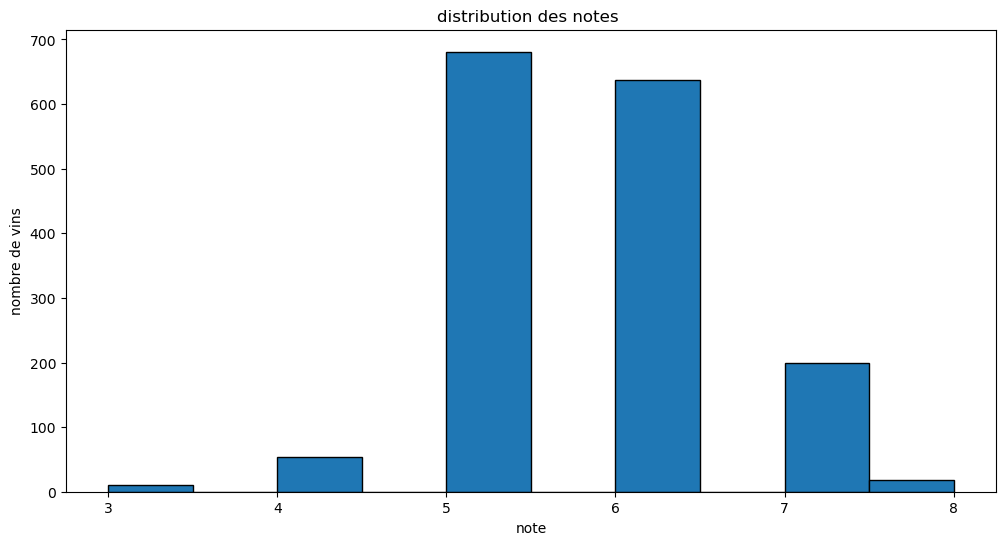

In [31]:
plt.subplots(figsize=(12,6))
plt.hist(df['quality'],bins=10,edgecolor='black')
plt.title('distribution des notes ')
plt.xlabel('note')
plt.ylabel('nombre de vins')
plt.show()

In [32]:
df['quality'].head(15)


0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
Name: quality, dtype: int64

In [33]:
df['quality_binaire']=(df['quality']>=7).astype(int)

df[['quality','quality_binaire']].head()


,quality,quality_binaire
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0


In [58]:
car=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density',
                  'pH','sulphates','alcohol']
result=[]
indexx=[]
for col in car:
    b_moyenne=df.loc[df['quality_binaire']==1,col].mean()
    m_moyenne=df.loc[df['quality_binaire']==0,col].mean()
    result.append({'bon quality-moyenne': b_moyenne,'mauvaise quality -moyenne' :m_moyenne})
    indexx.append(col)
    resultt=pd.DataFrame(result,index=indexx)
print(resultt)
    
   


                      bon quality-moyenne  mauvaise quality -moyenne
fixed acidity                    8.847005                   8.236831
volatile acidity                 0.405530                   0.547022
citric acid                      0.376498                   0.254407
residual sugar                   2.708756                   2.512120
chlorides                        0.075912                   0.089281
free sulfur dioxide             13.981567                  16.172214
total sulfur dioxide            34.889401                  48.285818
density                          0.996030                   0.996859
pH                               3.288802                   3.314616
sulphates                        0.743456                   0.644754
alcohol                         11.518049                  10.251037


In [69]:
corr=df.corr()
corrs=corr['quality_binaire'].sort_values(ascending=False)
print(corrs)

quality_binaire         1.000000
quality                 0.710196
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality_binaire, dtype: float64


In [73]:
df['prediction_manuelle']=((df['alcohol']>12 )& df['volatile acidity']<0.6).astype(int) 
precision=(df['prediction_manuelle']==df['quality_binaire']).mean()
print(precision)

0.14133833646028768
